# UNSUPERVISED LEARNING
# EXPERIMENT-1
## PCA(Principal Component Analysis) on MNIST Dataset

In [ ]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# IMPORTING THE DATASET
df = pd.read_csv('train.csv', nrows = 20000)
print("the shape of data is :", df.shape)
df.head()

the shape of data is : (20000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting label column from the dataset
## Plotting a random sample data point from The dataset using matplotlib imshow() method

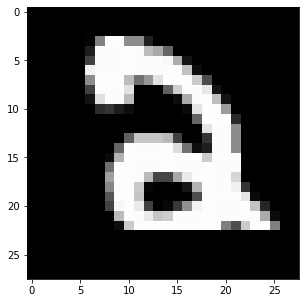

2


In [ ]:
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

### Column standardization of our dataset using StandardScalar class of sklearn.preprocessing module. because after column standardization of our data the mean of every feature becomes 0 (zero) and variance 1. so we perform PCA from the origin point.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(20000, 784)

### Now Find the Co-Variance matrix which is AT * A using NumPy matmul method. after multiplication, the dimensions of our Co-Variance matrix is 784 * 784 because AT(784 * 20000) * A(20000 * 784).

In [ ]:
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

### Finding the top two Eigen-values and corresponding eigenvectors for projecting onto a 2D surface. The parameter ‘eigvals’ is defined (low value to high value), the eigh function will return the eigenvalues in ascending order and this code generates only the top 2 (782 and 783) eigenvalues.

### converting the eigenvectors into (2,d) form for easiness of further computations

In [ ]:
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)


Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


### here the vectors[1] represent the eigenvector corresponding 1st principal eigenvector

### here the vectors[0] represent the eigenvector corresponding 2nd principal eigenvector

### If we multiply the two top vectors to the Co-Variance matrix, we found our two principal components PC1 and PC2.

In [ ]:
final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)

vectros: (2, 784) n std_df: (784, 20000) n final_df: (2, 20000)


### Now we vertically stack our final_df and label and then Transpose them, then we found the NumPy data table so with the help of pd.DataFrame we create the data frame of our two components with class labels.

In [ ]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,5.430697,5.060862,1.0
1,-6.242999,-19.293148,0.0
2,1.828611,7.684498,1.0
3,-5.585495,0.440132,4.0
4,-6.333250,-26.597773,0.0
...,...,...,...
19995,-8.883210,-7.373862,9.0
19996,-4.603450,1.685284,9.0
19997,5.469740,0.084802,6.0
19998,-16.308297,-2.961823,8.0


### visualize the final data with help of the seaborn FacetGrid method.

C:\Users\SWAPAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


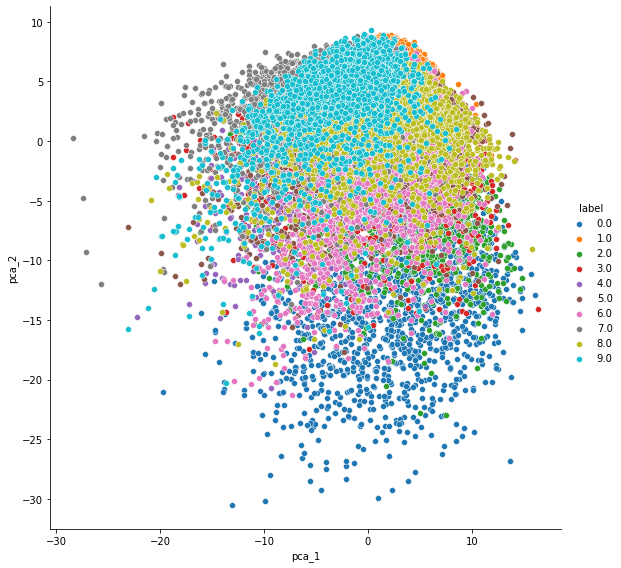

In [ ]:
sns.FacetGrid(dataFrame, hue = 'label', size =8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()

### we are successfully converted our 20000 * 785 data to 20000*3 using PCA